## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

#### Change your present working directory

In [0]:
project_path = "/content/drive/My Drive/"

### Load your data file

In [19]:
import pandas as pd
temp = pd.read_csv(project_path+'daily-minimum-temperatures-in-me.csv', index_col='Date')
temp.sort_index(inplace=True)
temp

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


#### Plot data

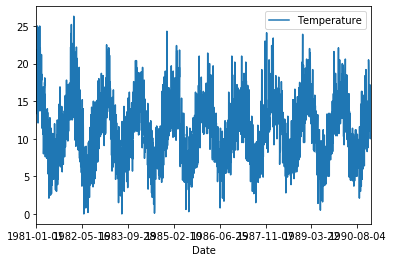

In [20]:
# Plot the data
temp.plot()

#### Descibe your dataframe

In [22]:
# Dataframe info

temp.shape  #3650 rows and 1 col

(3650, 1)

In [23]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
Temperature    3650 non-null float64
dtypes: float64(1)
memory usage: 57.0+ KB


#### Check for null values

In [24]:
#Check for null values

temp.isnull().sum()

# No nulls in the dataset

Temperature    0
dtype: int64

#### Drop null values

In [0]:
#Drop Nulls or NA

temp.dropna(inplace=True)

#### Get the representation of the distribution of data in the form of histogram

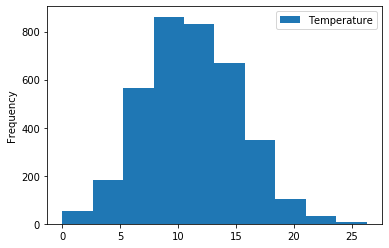

In [26]:
import matplotlib.pyplot as plt

temp.plot.hist()

#### Check the maximum and minimum values

In [27]:
#Check maximum and minimum values

import numpy as np
print('Min', np.min(temp))
print('Max', np.max(temp))

Min Temperature    0.0
dtype: float64
Max Temperature    26.3
dtype: float64


### Normalize the data

In [0]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0, 1))
scaled = scale.fit_transform(temp)

#### Check the maximum and minimum values of scaled data

In [29]:
# Max and Min values of Scaled data
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


#### Look into some of the scaled values

In [31]:
# Some scaled values
scaled[:5]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046]])

### Split data into Training and Testing

In [32]:
# Splitting in the ratio of 7:3 the train and test set

#70% examples will used for training 
train_size = int(len(scaled) * 0.70)

#30% will be used for Test
test_size = len(scaled - train_size)

#Split the data
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2555
test: 1095


#### Print train and test size

In [35]:
# Train shape

print ('Train shape is', train.shape);

# Test shape
print ('Train shape is', test.shape);



Train shape is (2555, 1)
Train shape is (1095, 1)


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
# Function to create sequential dataset for train and test set

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]        
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#### Use function to get training and test set

In [0]:
#Create Input and Output

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [41]:
print ('Train shape', X_train.shape)
print ('Test shape', X_test.shape)
print ('Train shape', y_train.shape)
print ('Test shape', y_test.shape)

Train shape (2554, 1)
Test shape (1094, 1)
Train shape (2554,)
Test shape (1094,)


#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [42]:
#Reshape the train and test input (samples, features, time steps)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2554, 1, 1)
(1094, 1, 1)


## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [0]:
# Model 

import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(look_back, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')


### Summarize your model

In [74]:
# Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [75]:
# Train the model
model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=32)

Train on 2554 samples, validate on 1094 samples
Epoch 1/200
2554/2554 [==============================] - 1s 356us/sample - loss: 0.0867 - val_loss: 0.0264
Epoch 2/200
2554/2554 [==============================] - 0s 97us/sample - loss: 0.0153 - val_loss: 0.0124
Epoch 3/200
2554/2554 [==============================] - 0s 101us/sample - loss: 0.0132 - val_loss: 0.0117
Epoch 4/200
2554/2554 [==============================] - 0s 92us/sample - loss: 0.0125 - val_loss: 0.0111
Epoch 5/200
2554/2554 [==============================] - 0s 98us/sample - loss: 0.0119 - val_loss: 0.0104
Epoch 6/200
2554/2554 [==============================] - 0s 93us/sample - loss: 0.0114 - val_loss: 0.0100
Epoch 7/200
2554/2554 [==============================] - 0s 94us/sample - loss: 0.0109 - val_loss: 0.0096
Epoch 8/200
2554/2554 [==============================] - 0s 96us/sample - loss: 0.0106 - val_loss: 0.0092
Epoch 9/200
2554/2554 [==============================] - 0s 96us/sample - loss: 0.0104 - val_loss: 0.0

## Make Predictions and Evaluate your model

In [0]:
#Prediction for both Training and Test Data
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [77]:
# Check on a sample
trainPredict[0]

array([0.68610895], dtype=float32)

In [0]:
# Inverse Normalize back the predicted values

trainPredict = scale.inverse_transform(trainPredict)
testPredict = scale.inverse_transform(testPredict)
trainY = scale.inverse_transform([y_train])
testY = scale.inverse_transform([y_test])

In [79]:
# Check on a sample
trainPredict[0]

array([18.044664], dtype=float32)

In [80]:
# calculate root mean squared error
import math
from sklearn.metrics import mean_squared_error

TrainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (TrainScore))
TestScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (TestScore))

Train Score: 2.62 RMSE
Test Score: 2.46 RMSE


## Plot the results

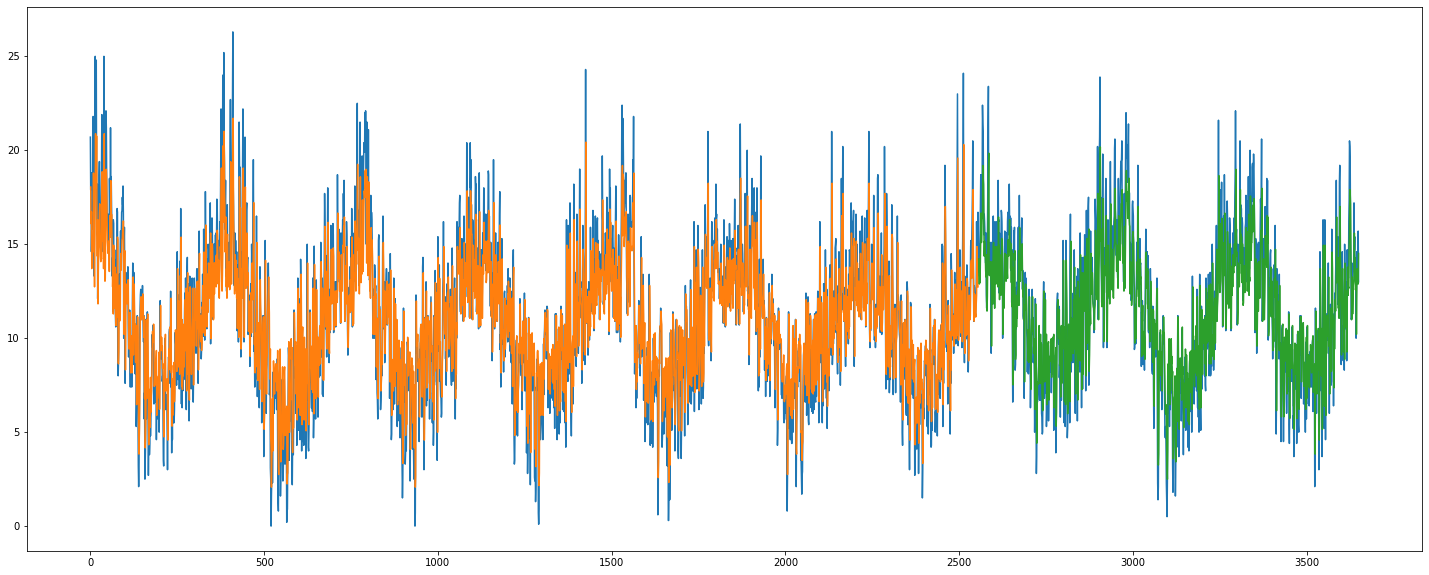

In [85]:
import matplotlib.pyplot as plt
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(scaled), :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(25,10))
plt.plot(scale.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()